# Can a Neural Network model if-else statements?

- Give the neural network some training examples of a particular if-else statement constructed (in increasing difficulty), and see what the neural network can do
- Using Mean Squared Error as the Loss Function
- Neural Networks are Multi-Layered Perceptrons, but can be made more complex later

In [295]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [393]:
def myplot(line1, line2, fmt = '-'):
    plt.plot(line1, fmt, color = 'blue',  label = 'pred')
    plt.plot(line2, fmt, color = 'green', label = 'actual')
    plt.legend()
    plt.show()

In [320]:
def fun1(x):
    if x>30:
        return 0
    else:
        return 1

In [321]:
inputs = keras.Input(shape=(1,))
# x = layers.Dense(10, activation="relu")(inputs)
outputs = layers.Dense(1, activation = "sigmoid")(inputs)
model = keras.Model(inputs = inputs, outputs = outputs)

In [322]:
model.summary()

Model: "functional_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [323]:
x = np.array([i for i in range(60)])
y = np.array([fun1(i) for i in x])
maxx = np.max(x)
x = np.array([i/maxx for i in x])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

model.compile(loss = 'mse', optimizer = keras.optimizers.Adam(lr = 0.1))

model.fit(x_train, y_train, batch_size=1, epochs=20, validation_data = (x_test, y_test))

Epoch 1/20
54/54 [==============================] - 1s 9ms/step - loss: 0.1732 - val_loss: 0.1606
Epoch 2/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1235 - val_loss: 0.1398
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 0.1158
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.1037
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0667 - val_loss: 0.1010
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0616 - val_loss: 0.1058
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0590 - val_loss: 0.1002
Epoch 8/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.0871
Epoch 9/20
54/54 [==============================] - 0s 5ms/step - loss: 0.0493 - val_loss: 0.0923
Epoch 10/20
54/54 [==============================] - 0s 5ms/step - loss: 0.0474 - val_loss: 0.0927
Epoch 11/20
54/54 [

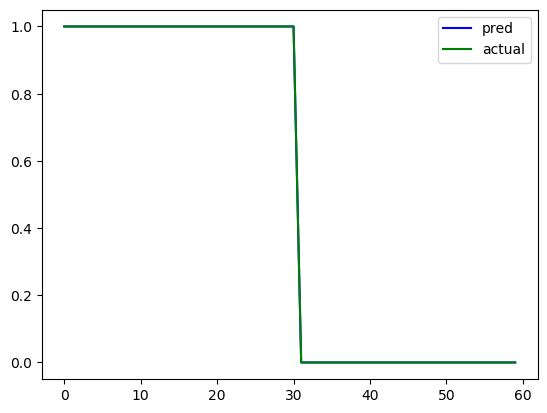

In [324]:
# Visualize how good the prediction is
myplot(list(map(int,map(round, model([np.array([i/60 for i in range(60)])]).numpy().flatten()))), y)

## Simple if-else statement
# Verdict: Solved (with a lot of tuning)

In [345]:
def fun2(x):
    if x>=300:
        return x
    else:
        return x*2

In [370]:
inputs = keras.Input(shape=(1,))
x = layers.Dense(100, activation="relu")(inputs)
x = layers.Dense(100, activation="relu")(x)
outputs = layers.Dense(1, activation = "linear")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [371]:
model.summary()

Model: "functional_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_71 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_72 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [380]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

x = np.array([i for i in range(600)])
y = np.array([fun2(i) for i in x])
maxx = np.max(x)
x = np.array([i/maxx for i in x])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

reducelr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=1, min_lr=0.001)

model.compile(loss = 'mae', optimizer = keras.optimizers.Adam(lr = 0.1))

model.fit(x_train, y_train, batch_size=1, epochs=30, validation_data = (x_test, y_test), callbacks = [reducelr])

Epoch 1/30
540/540 [==============================] - 1s 3ms/step - loss: 17.6033 - val_loss: 12.5034
Epoch 2/30
540/540 [==============================] - 1s 2ms/step - loss: 19.4896 - val_loss: 20.2901
Epoch 3/30
540/540 [==============================] - 1s 2ms/step - loss: 11.8099 - val_loss: 3.6649
Epoch 4/30
540/540 [==============================] - 1s 2ms/step - loss: 10.4332 - val_loss: 2.3318
Epoch 5/30
540/540 [==============================] - 1s 2ms/step - loss: 9.2975 - val_loss: 2.2077
Epoch 6/30
540/540 [==============================] - 1s 2ms/step - loss: 11.2071 - val_loss: 2.1759
Epoch 7/30
540/540 [==============================] - 1s 2ms/step - loss: 5.6428 - val_loss: 3.1481
Epoch 8/30
540/540 [==============================] - 1s 2ms/step - loss: 6.3644 - val_loss: 6.5247
Epoch 9/30
540/540 [==============================] - 1s 2ms/step - loss: 4.4227 - val_loss: 0.8746
Epoch 10/30
540/540 [==============================] - 1s 2ms/step - loss: 4.0483 - val_loss:

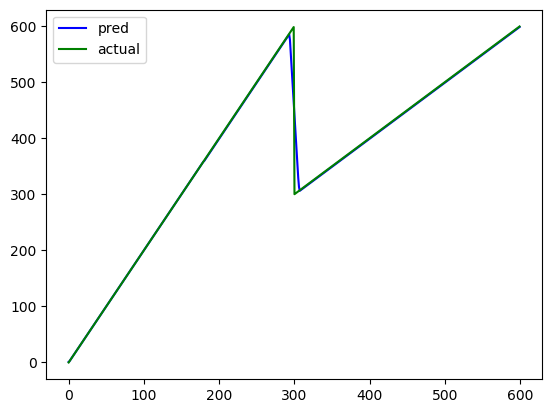

In [381]:
# Within-distribution data
myplot(list(map(int,map(round, model([np.array([i/600 for i in range(600)])]).numpy().flatten()))), y)

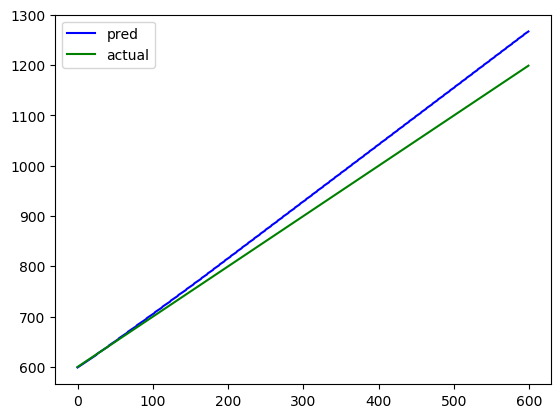

In [383]:
# out-of-distribution data (right)
myplot(list(map(int,map(round, model([np.array([i/600 for i in range(600,1200)])]).numpy().flatten()))), [fun2(i) for i in range(600,1200)])

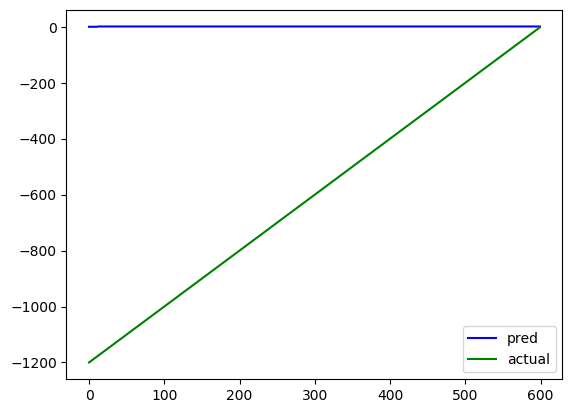

In [384]:
# out-of-distribution data (left)
myplot(list(map(int,map(round, model([np.array([i/600 for i in range(-600,0)])]).numpy().flatten()))), [fun2(i) for i in range(-600,0)])

## A bit more complex if-else statement
# Verdict: Solved (with a lot of tuning)

In [385]:
def fun3(x):
    if x%2 == 0:
        return x
    else:
        return x*2

In [397]:
inputs = keras.Input(shape=(1,))
x = layers.Dense(1000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(1, activation = "linear")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [398]:
model.summary()

Model: "functional_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_77 (Dense)             (None, 1000)              2000      
_________________________________________________________________
dense_78 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________


In [399]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

x = np.array([i for i in range(600)])
y = np.array([fun3(i) for i in x])
maxx = np.max(x)
x = np.array([i/maxx for i in x])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

reducelr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=1, min_lr=0.001)

model.compile(loss = 'mae', optimizer = keras.optimizers.Adam(lr = 0.1))

model.fit(x_train, y_train, batch_size=1, epochs=30, validation_data = (x_test, y_test), callbacks = [reducelr])

Epoch 1/30
540/540 [==============================] - 4s 7ms/step - loss: 268.9054 - val_loss: 300.8130
Epoch 2/30
540/540 [==============================] - 3s 6ms/step - loss: 246.8990 - val_loss: 300.7852
Epoch 3/30
540/540 [==============================] - 4s 7ms/step - loss: 246.0945 - val_loss: 296.3124
Epoch 4/30
540/540 [==============================] - 4s 7ms/step - loss: 247.6899 - val_loss: 306.0140
Epoch 5/30
540/540 [==============================] - 4s 7ms/step - loss: 245.6688 - val_loss: 298.4887
Epoch 6/30
540/540 [==============================] - 4s 7ms/step - loss: 245.5154 - val_loss: 298.0266
Epoch 7/30
540/540 [==============================] - 4s 7ms/step - loss: 245.7303 - val_loss: 299.2426
Epoch 8/30
540/540 [==============================] - 4s 7ms/step - loss: 245.1599 - val_loss: 299.7972
Epoch 9/30
540/540 [==============================] - 4s 7ms/step - loss: 245.4984 - val_loss: 300.0635
Epoch 10/30
540/540 [==============================] - 4s 7ms/st

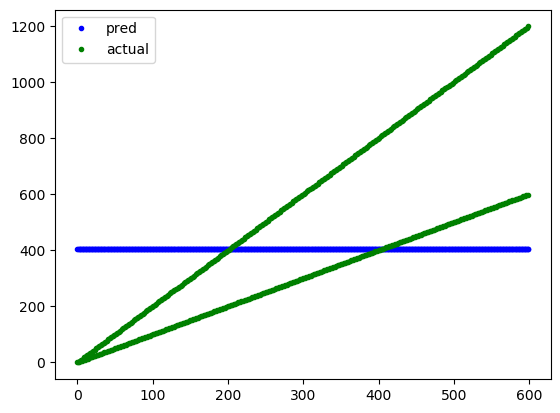

In [400]:
# Within-distribution data
myplot(list(map(int,map(round, model([np.array([i/600 for i in range(600)])]).numpy().flatten()))), y, '.')

## Modulo in if-else statement
# Verdict: Unsolved, possibly need to encode the modulo operator as part of the model explicitly